# Pattern Recognition
## Ehsan Kouchaki
### Dec. 23, 2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading data

In [2]:
xls = pd.ExcelFile('Computer_Assignment_4_Data.xls')
df_Weights = pd.read_excel(xls, 'Initial Weights')
df_Train = pd.read_excel(xls, 'Training Set')
df_Test = pd.read_excel(xls, 'Testing Set')

### Initial parameters

In [3]:
W12_1 = df_Weights.iloc[3:7, 2].to_numpy(dtype=float)
W12_2 = df_Weights.iloc[7:11, 2].to_numpy(dtype=float)
W12 = np.stack((W12_1, W12_2), axis = 1)
bias2 = df_Weights.iloc[11:15, 2].to_numpy(dtype=float)

W23_1 = df_Weights.iloc[3:5, 6].to_numpy(dtype=float)
W23_2 = df_Weights.iloc[5:7, 6].to_numpy(dtype=float)
W23_3 = df_Weights.iloc[7:9, 6].to_numpy(dtype=float)
W23_4 = df_Weights.iloc[9:11, 6].to_numpy(dtype=float)
W23 = np.stack((W23_1, W23_2, W23_3, W23_4), axis = 1)
bias3 = df_Weights.iloc[11:13, 6].to_numpy(dtype=float)

learning_rate = df_Weights.iloc[17:18, 2].to_numpy(dtype=float)[0]
Epochs = df_Weights.iloc[18:19, 2].to_numpy(dtype=int)[0]

Train = df_Train.iloc[1:, 1:].to_numpy(dtype=float)
Test = df_Test.iloc[1:, :].to_numpy(dtype=float)

X_train = Train[:, 0:2].T
Y_train = Train[:, 2:4].T

X_test = Test[:, 1:3].T

## Affine and activation modules

In [4]:
def sigmoid(z):
    sigma = 1/(1 + np.exp(-z))
    return sigma

def dsigmoid(z):
    sigma = 1/(1 + np.exp(-z))
    sigmap = sigma * (1 - sigma)
    return sigmap

def affine_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

def Sigmoid_forward(Z):
    A = sigmoid(Z)
    cache = Z
    return A, cache

def compute_cost(y_hat, Y):
    cost = - np.sum(np.multiply(np.log(y_hat),Y) +
                    np.multiply(np.log(1 - y_hat),(1 - Y))) / y_hat.shape[1]
    return cost

def affine_backward(dZ, cache):
    A_l_1, W_l, b_l = cache[0], cache[1], cache[2]
    m = A_l_1.shape[1]
    
    dW_l = 1 / m * np.dot(dZ, A_l_1.T)
    db_l = 1 / m * np.sum(dZ, axis = 1, keepdims = True)
    dA_l_1 = np.dot(W_l.T, dZ)
    return dA_l_1, dW_l, db_l

def Sigmoid_backward(dA, cache):
    Z_l = cache
    dZ = dA * dsigmoid(Z_l)
    return dZ
    


## Train 

Cost after iteration 0: 1.361704
Cost after iteration 25: 0.439532
Cost after iteration 50: 0.431352
Cost after iteration 75: 0.426506
Cost after iteration 100: 0.423563
Cost after iteration 125: 0.421909
Cost after iteration 150: 0.421076
Cost after iteration 175: 0.420718
Cost after iteration 200: 0.420620
Cost after iteration 225: 0.420662
Cost after iteration 250: 0.420778
Cost after iteration 275: 0.420931
Cost after iteration 300: 0.421105
Cost after iteration 325: 0.421288
Cost after iteration 350: 0.421475
Cost after iteration 375: 0.421664
Cost after iteration 400: 0.421853
Cost after iteration 425: 0.422042
Cost after iteration 450: 0.422230
Cost after iteration 475: 0.422416
Cost after iteration 499: 0.422594


The weights between input and first layer (W12) is:
 [[ 10.64003172  -1.61215428]
 [-35.23932599   1.86077381]
 [ -1.54661378  -0.89600427]
 [ -4.66714657  -0.83505612]]

The bias of the first layer (W12) is:
 [[-5.7759772 ]
 [16.80353626]
 [-1.7555122 ]
 [ 0.04850409

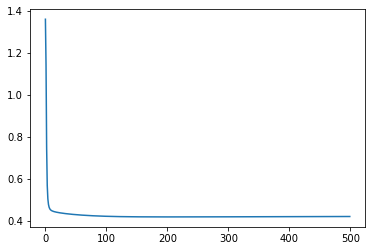

In [5]:
Weights = [W12, W23]                                   # لیست نگهدارنده وزنها
biases = [bias2.reshape(4,1), bias3.reshape(2,1)]      # لیست نگهدارنده بایاسها

losses = []
for epoch in range(Epochs):
    for i in range(500):    
        A = X_train[:, 2*i:2*i+2]
        target = Y_train[:, 2*i:2*i+2]
        caches = []
        
        # انتشار به جلو برای لایه اول
        Z, cache = affine_forward(A, Weights[0], biases[0])
        caches.append(cache)
        A, cache = Sigmoid_forward(Z)
        caches.append(cache)

        # انتشار به جلو برای لایه آخر
        Z, cache = affine_forward(A, Weights[1], biases[1])
        caches.append(cache)
        y_hat , cache = Sigmoid_forward(Z)
        caches.append(cache)

        # محاسبه هزینه
        cost = compute_cost(y_hat, target)
        
        grads = {}
        # پس انتشار برای لایه آخر
        current_cache = caches[2 * 2 - 1]   # Z of the last layer
        dZ = y_hat-target
        current_cache = caches[2 * 2 - 2]
        dA, dW, db = affine_backward(dZ, current_cache)
        grads["dA" + str(1)], grads["dW" + str(2)], grads["db" + str(2)] = dA, dW, db

        # پس انتشار برای لایه اول
        current_cache = caches[1]   # Z of the l'th layer
        dZ =Sigmoid_backward(dA, current_cache)
        current_cache = caches[0]
        dA, dW, db = affine_backward(dZ, current_cache)
        grads["dA" + str(0)], grads["dW" + str(1)], grads["db" + str(1)] = dA, dW, db

        # بروز کردن وزنها و بایاسها
        for l in range(2):
            Weights[l] = Weights[l] - learning_rate * grads["dW" + str(l+1)]
            biases[l] = biases[l] - learning_rate * grads["db" + str(l+1)]

    losses.append(cost)
    
    # Print the cost
    if (epoch % int(Epochs / 20) == 0 or epoch == 499):
        print ("Cost after iteration %i: %f" %(epoch, cost))
    
plt.plot(losses)

print("\n\nThe weights between input and first layer (W12) is:\n", Weights[0])
print("\nThe bias of the first layer (W12) is:\n", biases[0])
print("\nThe weights between first and output layer (W23) is:\n", Weights[1])
print("\nThe bias of the output layer (W12) is:\n", biases[1])

## Test

The list of miss classified samples are:

sample no.  11 from class  1.0
sample no.  16 from class  1.0
sample no.  25 from class  1.0
sample no.  37 from class  1.0
sample no.  56 from class  1.0
sample no.  66 from class  1.0
sample no.  94 from class  1.0
sample no.  98 from class  1.0
sample no.  120 from class  1.0
sample no.  133 from class  1.0
sample no.  134 from class  1.0
sample no.  137 from class  1.0
sample no.  148 from class  1.0
sample no.  151 from class  1.0
sample no.  154 from class  1.0
sample no.  197 from class  1.0
sample no.  211 from class  1.0
sample no.  212 from class  1.0
sample no.  214 from class  1.0
sample no.  221 from class  1.0
sample no.  229 from class  1.0
sample no.  269 from class  1.0
sample no.  282 from class  1.0
sample no.  295 from class  1.0
sample no.  298 from class  1.0
sample no.  310 from class  1.0
sample no.  318 from class  1.0
sample no.  347 from class  1.0
sample no.  376 from class  1.0
sample no.  377 from class  1.0
sample

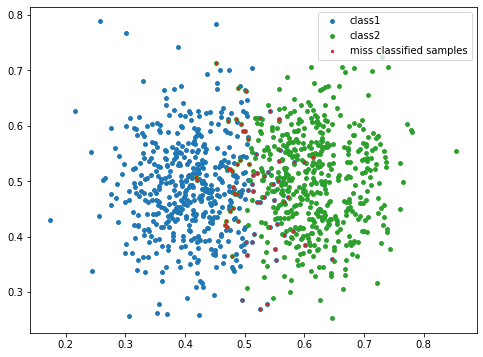

In [6]:
# انتشار به جلو برای لایه اول
A = X_test
Z, cache = affine_forward(A, Weights[0], biases[0])
A, cache = Sigmoid_forward(Z)

# انتشار به جلو برای لایه آخر
Z, cache = affine_forward(A, Weights[1], biases[1])
Y_hat, cache = Sigmoid_forward(Z)

confus_matrix = np.zeros((2, 2))
x1_miss_class = []
x2_miss_class = []
print("The list of miss classified samples are:\n")

for i in range(1000):
    label = Test[i, 0]
    if (Y_hat[0, i] > Y_hat[1, i]): predicted_class = 1
    else: predicted_class = 2
    if (label == 1 and predicted_class == 2):
        confus_matrix[0, 1] += 1
        x1_miss_class.append(X_test[0, i])
        x2_miss_class.append(X_test[1, i])
        print("sample no. ", i+1, "from class ", label)
        
    elif (label == 2 and predicted_class == 1):
        confus_matrix[1, 0] += 1
        x1_miss_class.append(X_test[0, i])
        x2_miss_class.append(X_test[1, i])
        print("sample no. ", i+1, "from class ", label)

confus_matrix[0, 0] = 500 - confus_matrix [0, 1]  
confus_matrix[1, 1] = 500 - confus_matrix [1, 0]

confusion_matrix = pd.DataFrame(confus_matrix, index=['c1(actual)', 'c2(actual)'],
                                columns=['c1(predicted)', 'c2(predicted)'])
print("\nThe Confusion matix is: \n", confusion_matrix)

plt.figure(figsize = (8, 6))
plt.scatter(X_test[0,0:500], X_test[1,0:500], s=15)
plt.scatter(X_test[0,500:1000], X_test[1,500:1000], s=15, c = '#2ca02c')
plt.scatter(x1_miss_class, x2_miss_class, s=5, c = '#d62728')
plt.legend(["class1", "class2", "miss classified samples"])